In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import pylab
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.tsa.api as smt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import linear_model
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.datasets import load_boston
boston=load_boston()

In [2]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [3]:
bos = pd.DataFrame(boston.data, columns=boston.feature_names)
bos['Price'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [21]:
y = bos['Price']
x = bos.drop(['Price'], axis=1)

In [22]:
xc = sm.add_constant(x)
lin_reg = sm.OLS(y, xc)
result = lin_reg.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 22 Oct 2019   Prob (F-statistic):          6.72e-135
Time:                        11:29:10   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

In [26]:
y = bos['Price']
x = bos.drop(['Price','INDUS','AGE'], axis=1)

In [27]:
xc = sm.add_constant(x)
lin_reg = sm.OLS(y, xc)
result = lin_reg.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Tue, 22 Oct 2019   Prob (F-statistic):          5.54e-137
Time:                        11:55:52   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3411      5.067      7.171      0.0

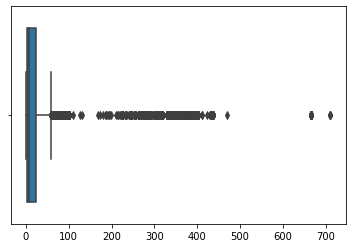

In [28]:
sns.boxplot(bos)

Assumption-1 Normality of residuals

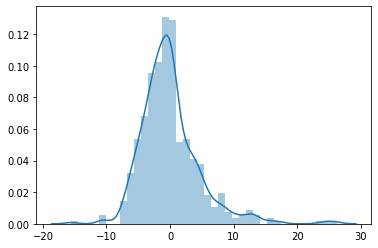

In [29]:
res = result.resid
sns.distplot(res)

In [30]:
res.mean()

-5.072797693544194e-15

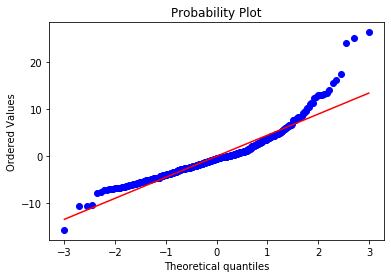

In [31]:
stats.probplot(res, plot=pylab)
plt.show()

QQ plot shows that residuals are close to normality around the mean. It deviates from normality at extreme values.


Jarque Berra Test

In [32]:
print(stats.jarque_bera(res))

(787.7851418746452, 0.0)


SCALING
- Standardization
- Normalization

log transform

In [33]:
lny = np.log(y)
lin_reg = sm.OLS(lny, xc)
result = lin_reg.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     168.1
Date:                Tue, 22 Oct 2019   Prob (F-statistic):          4.31e-159
Time:                        11:56:54   Log-Likelihood:                 129.02
No. Observations:                 506   AIC:                            -234.0
Df Residuals:                     494   BIC:                            -183.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0837      0.203     20.112      0.0

In [34]:
res = result.resid
print(stats.jarque_bera(res))

(227.36073522664645, 0.0)


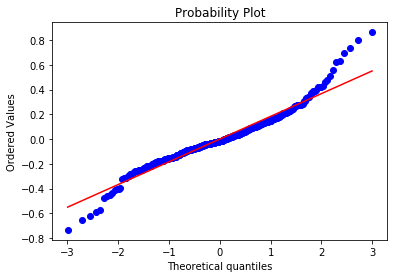

In [35]:
stats.probplot(res, plot=plt)
plt.show()

In [44]:
df = bos.copy()
df_log = df.transform(lambda x: np.log(x))
df_log.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,-5.064036,2.890372,0.837248,-inf,-0.619897,1.883275,4.177459,1.408545,0.000000,5.690359,2.727853,5.983684,1.605430,3.178054
1,-3.600502,-inf,1.955860,-inf,-0.757153,1.859574,4.368181,1.602836,0.693147,5.488938,2.879198,5.983684,2.212660,3.072693
2,-3.601235,-inf,1.955860,-inf,-0.757153,1.971996,4.112512,1.602836,0.693147,5.488938,2.879198,5.973377,1.393766,3.546740
3,-3.430523,-inf,0.779325,-inf,-0.780886,1.945624,3.824284,1.802073,1.098612,5.402677,2.928524,5.977949,1.078410,3.508556
4,-2.672924,-inf,0.779325,-inf,-0.780886,1.966693,3.992681,1.802073,1.098612,5.402677,2.928524,5.983684,1.673351,3.589059


In [45]:
df = bos.copy()
df_sqrt = df.transform(lambda x: x**0.5)
df_sqrt.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.079498,4.242641,1.519868,0.0,0.733485,2.564176,8.074652,2.022375,1.000000,17.204651,3.911521,19.922349,2.231591,4.898979
1,0.165257,0.000000,2.658947,0.0,0.684836,2.533969,8.882567,2.228699,1.414214,15.556349,4.219005,19.922349,3.023243,4.647580
2,0.165197,0.000000,2.658947,0.0,0.684836,2.680485,7.816649,2.228699,1.414214,15.556349,4.219005,19.819939,2.007486,5.890671
3,0.179917,0.000000,1.476482,0.0,0.676757,2.645373,6.767570,2.462154,1.732051,14.899664,4.324350,19.865296,1.714643,5.779273
4,0.262774,0.000000,1.476482,0.0,0.676757,2.673387,7.362065,2.462154,1.732051,14.899664,4.324350,19.922349,2.308679,6.016644


In [46]:
y = df_sqrt['Price']
x = df_sqrt.drop(['Price'], axis=1)
xc = sm.add_constant(x)
lin_reg = sm.OLS(y, xc)
result = lin_reg.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     150.5
Date:                Tue, 22 Oct 2019   Prob (F-statistic):          5.21e-162
Time:                        12:10:11   Log-Likelihood:                -278.08
No. Observations:                 506   AIC:                             584.2
Df Residuals:                     492   BIC:                             643.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.1299      0.908     11.161      0.0

In [48]:
y = df_sqrt['Price']
x = df_sqrt.drop(['Price','INDUS','AGE','ZN'], axis=1)
xc = sm.add_constant(x)
lin_reg = sm.OLS(y, xc)
result = lin_reg.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     195.3
Date:                Tue, 22 Oct 2019   Prob (F-statistic):          1.01e-164
Time:                        12:11:26   Log-Likelihood:                -279.73
No. Observations:                 506   AIC:                             581.5
Df Residuals:                     495   BIC:                             628.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.2488      0.899     11.399      0.0

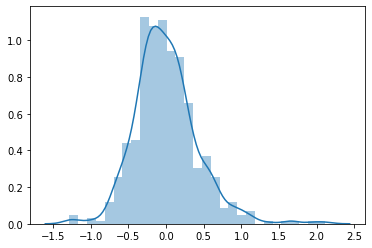

In [50]:
res = result.resid
sns.distplot(res)

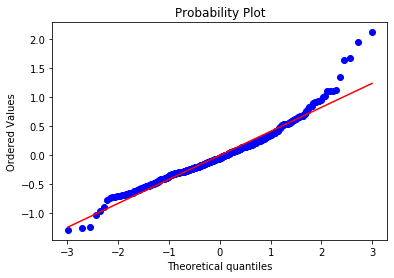

In [52]:
stats.probplot(res, plot=plt)
plt.show()

Asuumption-2 Multicollinearity

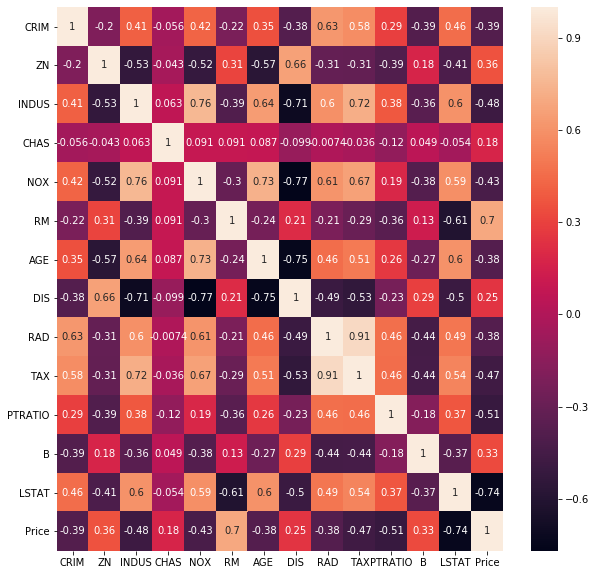

In [56]:
plt.figure(figsize=(10,10))
sns.heatmap(bos.corr(),annot=True)
plt.show()

In [57]:
y = bos['Price']
x = bos.drop('Price',axis=1)

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
pd.DataFrame({'vif': vif}, index=x.columns)

,vif
CRIM,2.100373
ZN,2.844013
INDUS,14.485758
CHAS,1.152952
NOX,73.894947
RM,77.948283
AGE,21.386850
DIS,14.699652
RAD,15.167725
TAX,61.227274


In [78]:
vif = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
pd.DataFrame({'vif': vif}, index=x.columns)

,vif
CRIM,1.583786
CHAS,1.093197
DIS,4.963302
PTRATIO,16.781444
B,16.234455


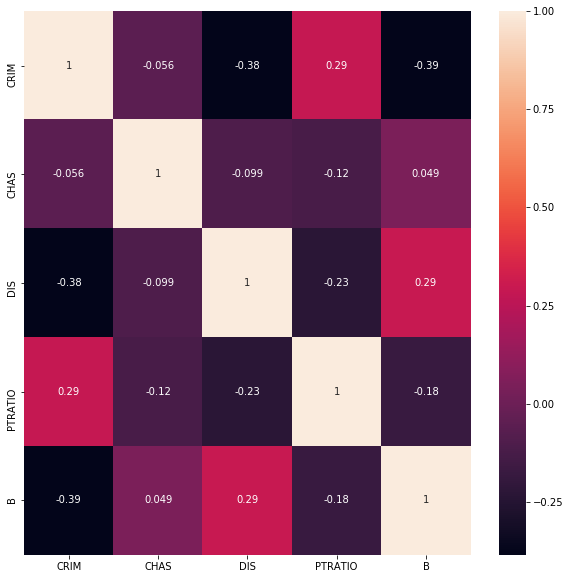

In [77]:
y = bos['Price']
x = bos.drop(['Price','AGE','INDUS','TAX','RAD','ZN','LSTAT','NOX','RM'],axis=1)

plt.figure(figsize=(10,10))
sns.heatmap(x.corr(),annot=True)
plt.show()

Assumption 3 - Homoscedasticity (constant variance of residuals)

In [79]:
y = bos['Price']
x = bos.drop(['Price'],axis=1)

xc = sm.add_constant(x)
lin_reg = sm.OLS(y, xc)
result = lin_reg.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 22 Oct 2019   Prob (F-statistic):          6.72e-135
Time:                        12:53:44   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

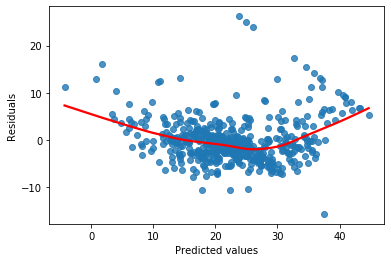

In [80]:
res = result.resid
y_pred = result.predict(xc)

sns.regplot(x=y_pred, y=res, lowess=True, line_kws={'color':'red'})
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

In [86]:
name = ['F statistic','P value']

model = lin_reg
test = sms.het_goldfeldquandt(y=res, x=xc)
test

(2.4311473253497464, 7.302071915608556e-12, 'increasing')

Assumption 4 - Auto-correlation

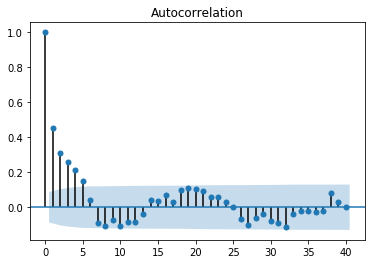

In [87]:
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(res, lags=40)
acf.show()

The ACF chart shows moderate correlation with errors of lag 1. This indicates mild autocorrelation also supported by DW-statistics of 1.078

Assumption 5 - Linearity of Relationship

In [88]:
y = bos['Price']
x = bos.drop(['Price'],axis=1)

xc = sm.add_constant(x)
lin_reg = sm.OLS(y, xc)
result = lin_reg.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 22 Oct 2019   Prob (F-statistic):          6.72e-135
Time:                        14:34:03   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

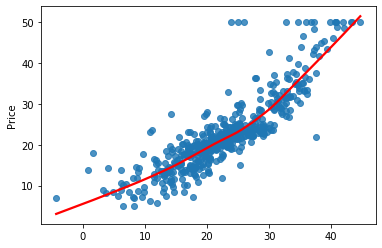

In [89]:
y_pred = result.predict(xc)
sns.regplot(x=y_pred, y=y, lowess=True, line_kws={'color':'red'})
plt.show()

In [ ]:
=